# Unsupervised Learning
* unlabeled data
  * there are input features X but no labels y
* "if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake." - Yann LeCunn 

## Clustering
* identifying similar observations and assigning them into groups or clusters
* used in a variety of applications
  * customer segmentation
    * cluster customers based on their purchases and their online activity
  * data analysis
  * dimensionality reduction
    * affinity: measure of how well an observation fits into a cluster
  * anomaly detection
    * an observation with a low affinity to all clusters is most likely an outlier
  * semi-supervised learning
    * perform clustering to provide labels to then use supervised learning techniques
  * search engines
  * segment image

* centroids: a certain point where majority of observations are centered around

In [ ]:
# Synthesizing data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Setting the center for each blob
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

## Setting the std for each blob
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

## Creating X and y data
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
# Function to plot a scatterplot

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

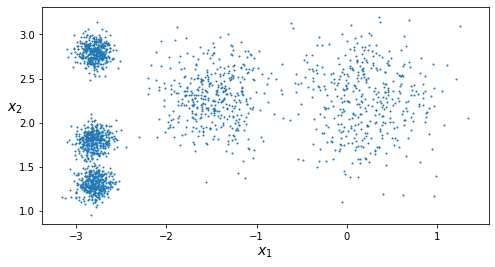

In [ ]:
# Plotting X

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### K-Means

In [ ]:
# Implementing K-Means

from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)

## Assigning a cluster for each observation
y_pred = kmeans.fit_predict(X)

## KMeans instance perserves a copy of the labels it was trained on
y_pred is kmeans.labels_

True

In [ ]:
# Viewing the location of the five centroids

kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [ ]:
# Predicting the clusters new data belongs to

X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

In [ ]:
# Functions to plot data, centroids, and boundaries

## Plotting data points
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

## Plotting the centroids
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

## Plotting the decision boundaries
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

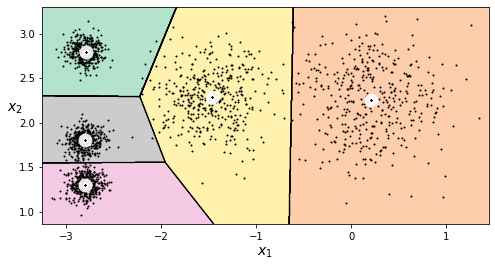

In [ ]:
# Plotting data

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

A few classes were mislabeled near the decision boundaries. 

**hard clustering**: assigning a single cluster for each observations

**soft clustering**: give a score for each cluster for each observation

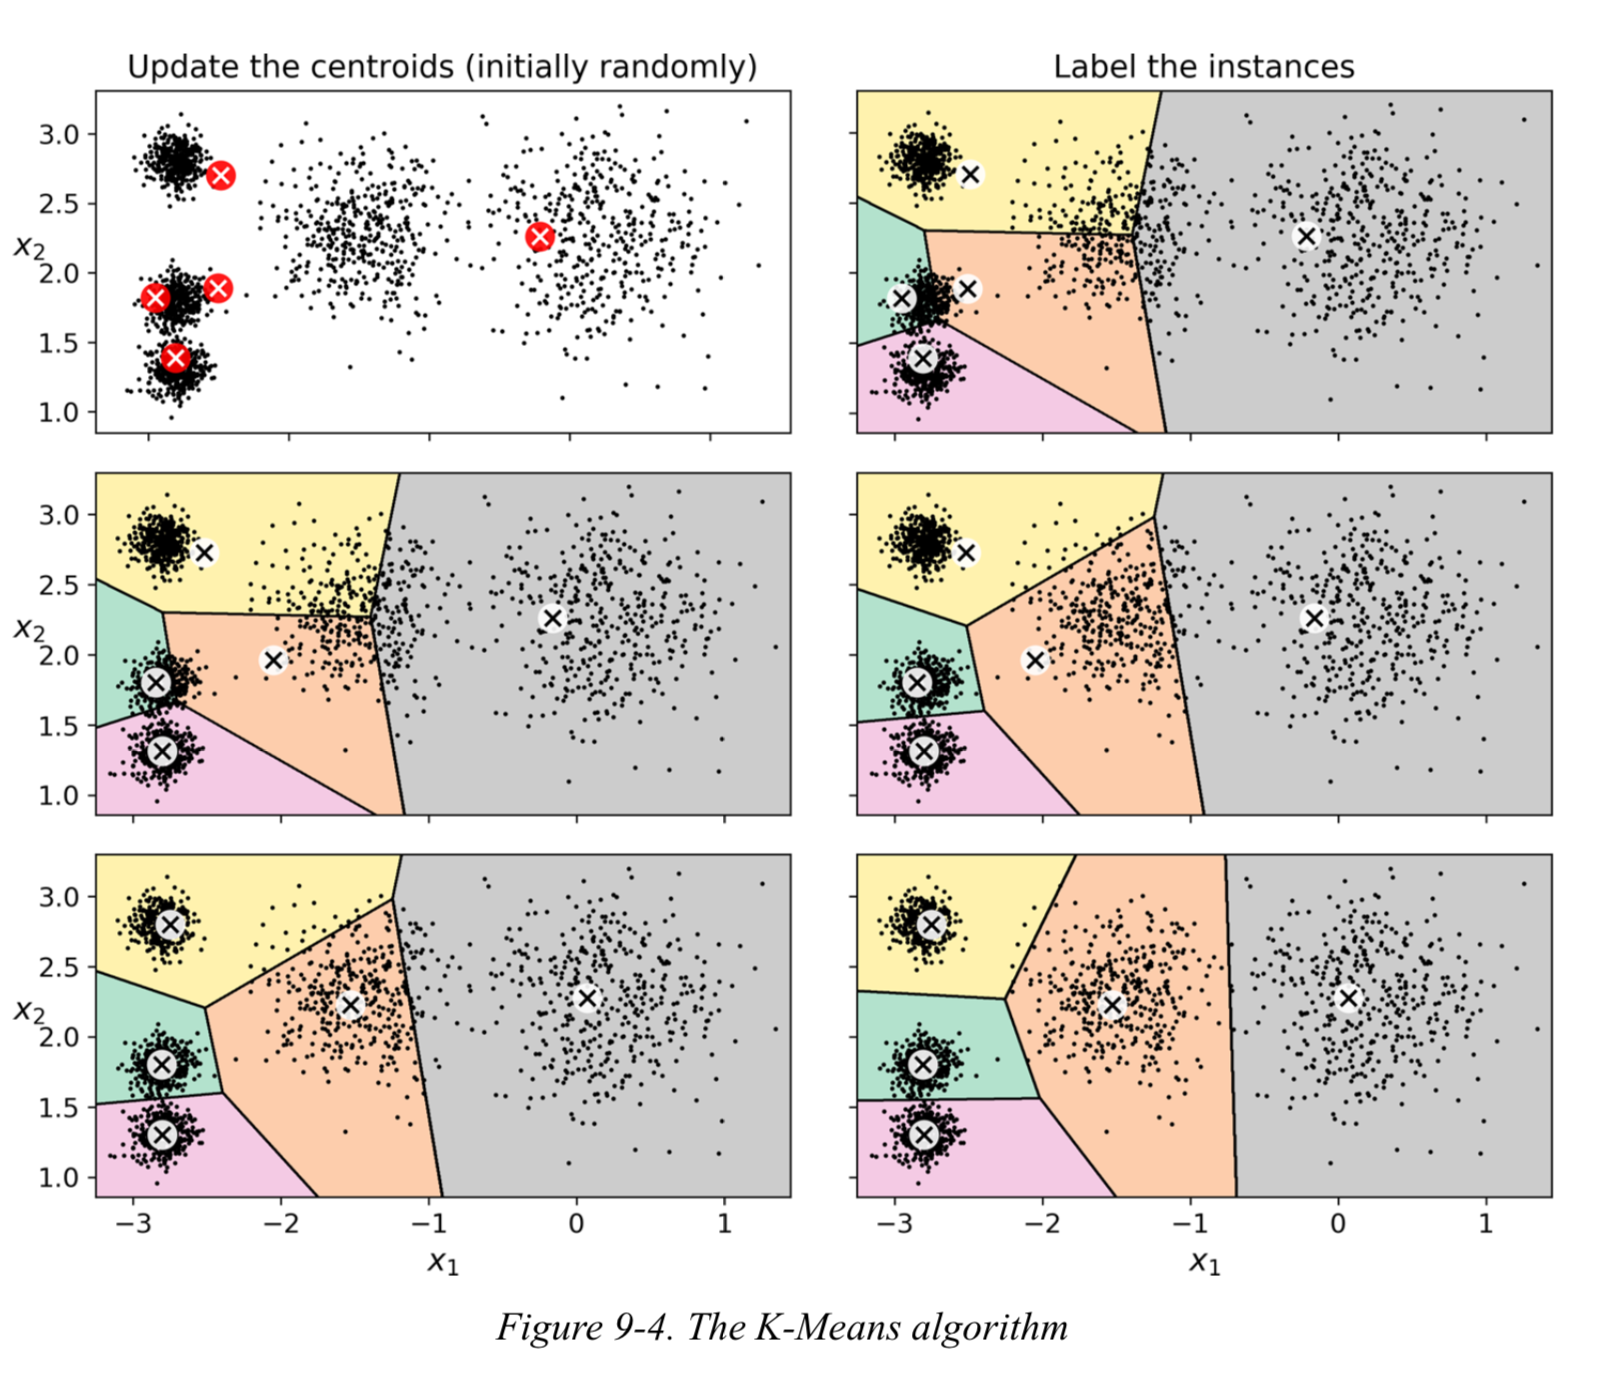

In [ ]:
# Set the starting locations of the centroids, if location might be known

good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another solution is to run the algorithm multiple times
* run it with different random initializations and keep the best one
  * *n_init* controls the number of initializations (default=10)
  * uses model's *inertia* to determine best solution
    * mean squared distance between each observation and its closest centroid
    * lowest -> best

In [ ]:
# Printing inertia and score

print(f'Inertia: {kmeans.inertia_}')
print(f'Score: {kmeans.score(X)}')

Inertia: 211.5985372581684
Score: -211.59853725816856


### KMeans++
* an improvement to K-Means algorithm proposed by David Arthur in 2006
  * https://maheshgoyani.in/resource/workshop/kmeans++.pdf
* smarter initialization step that chooses centroids that are distant from one another
  * much less likely to converge to a suboptimal solution
  * more computation early on but reduces the number of times algorithm needs to find optimal solution
* KMeans class uses this initialization method by default
  * to use original set *init* to "random"

### Accelerated K-Means and Mini-Batch K-Means
* accelerates algorithm by avoiding many unnecessary distance calculations
  * exploits the triangle inequality 
* mini-batches
  * use small batches, moving the centroid just slightly at each iteration
  * faster but inertia is generally worse
    * inertia: mean squared distance between centroid and observations
    * more noticeable as the number of clusters increase


In [ ]:
# Implementing Minibatch

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### Finding Optimal Number of Clusters
* inertia not a good metric to use to determine number of clusters because it will always favor the high number of clusters
  * as clusters increase, inertia always decreases
    * there are more centroids which means the distance from observation and centroid are getting smaller
  * can plot inertia vs clusters and chose the elbow point (inflexion point)
* silhouette score
  * mean silhouette coefficient over all observations
  * how close observations within a cluster are from other neighboring clusters
  * ranges from -1 to 1
    * 1 -> well inside its own cluster and far away from other clusters
    * 0 -> close to a cluster boundary
    * -1 -> the observation is well inside a **different** cluster and might have been assigned to wrong cluster

\begin{equation} \frac{(b-a)}{max(a,b)} \end{equation}
* a: mean distance to the other observations in the same cluster
* b: mean nearest-cluster distance
  * mean distance to the instances of the next closest cluster


In [ ]:
# Implementing a silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

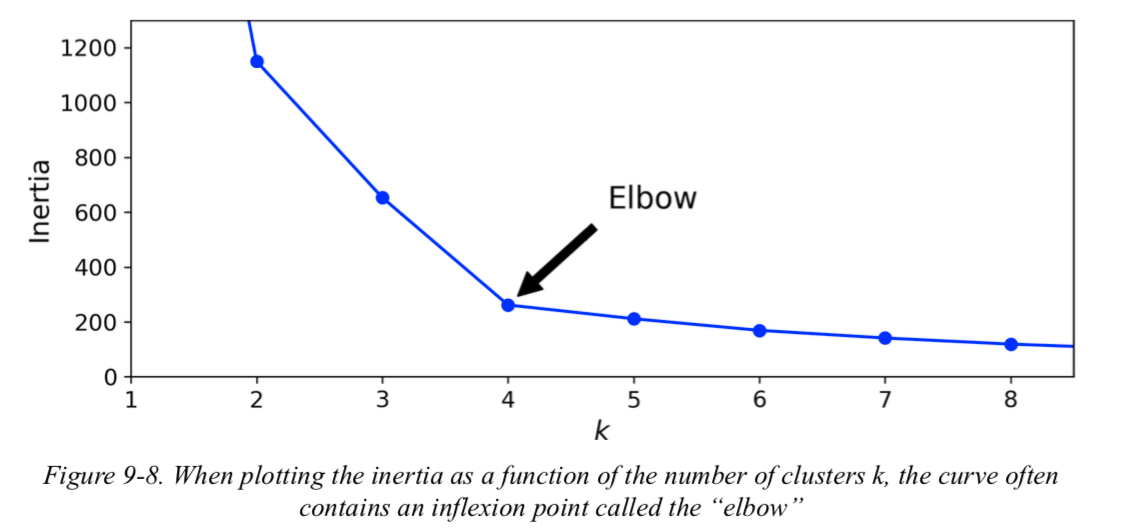

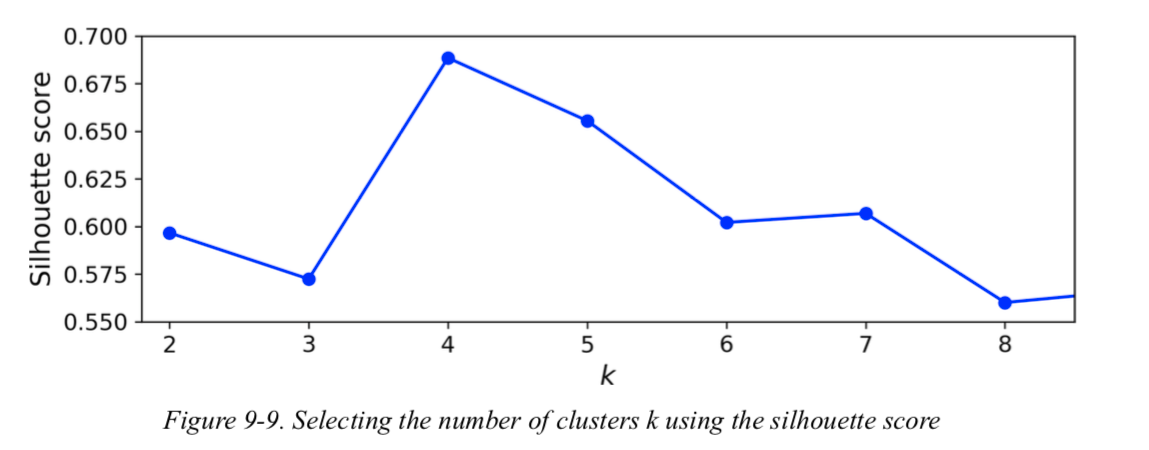

* the elbow graph shows that at k=4 is the inflexion point and might be the best number of clusters, even though number >4 shows better inertia.
* the silhouette graph also shows 4 to be the best number of clusters BUT shows that >4 is not any better

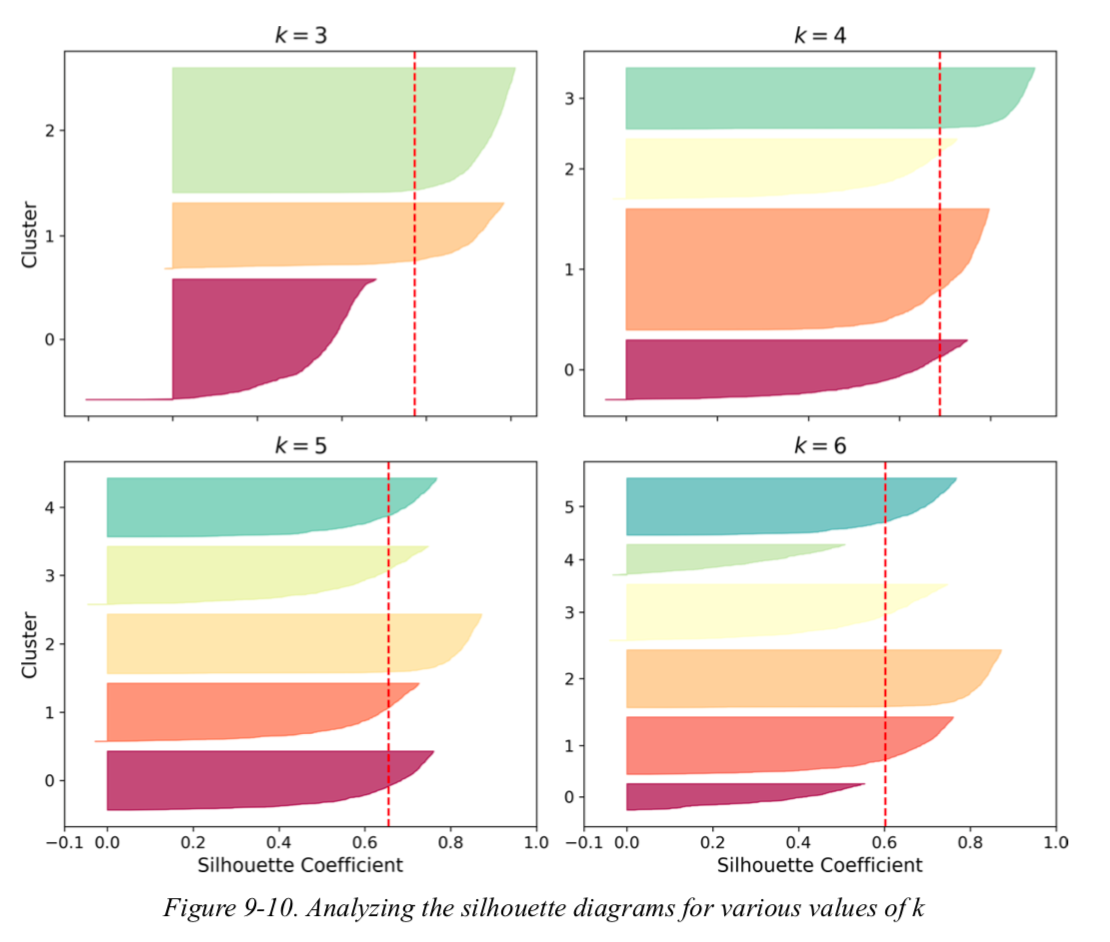

* silhouette diagram
  * contains a knife for each cluster
  * height -> number of observations in that cluster
  * width -> silhouette coefficientof the observations in the cluster (wider is better)
  * dashed lines -> mean silhouette coefficient
* when most observations have a lower coefficient that the mean, (k-3, k=6), the cluster is bad
  * that means most observations are much too close to ther clusters

### Limitations of K-Means
* needs to be scaled
* need to specify the number of clusters
* doesn't behave well when clusters have varying sizes, different densities, or nonspherical shape
  * on elliptical clusters, Gaussian mixture models work great

### Using Clustering for Image Segmentation
* partioning an image into multiple segments
* semantic segmentation: all pixels that are part of the same object type get assigned to the same segment
  * labeling pixels that are part of a person as a person segment
* instance segmentation: all pixels that are part of same individual object are assigned to same segment
  * labeling a person as Bill Gates
* color segmentation: assign pixels to the same segment if they have a similar color
  * in satellite images, if it is green assign it forestation

In [ ]:
# Reading in an image

import os
from matplotlib.image import imread

image = imread("https://github.com/ageron/handson-ml2/blob/master/images/unsupervised_learning/ladybug.png?raw=true")
image.shape

(533, 800, 3)

In [ ]:
# Reshaping the image

## Reshaping image to one dimension
X = image.reshape(-1, 3)

## Implement KMeans to cluster into 8 groups
kmeans = KMeans(n_clusters=8).fit(X)

## Getting the centroids
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

## Reshaping
segmented_img = segmented_img.reshape(image.shape)

### Using Clustering for Preprocessing
* dimension reduction

In [ ]:
# Reading in MNIST

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [ ]:
# Fitting vanilla Logistic Regression for baseline

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [ ]:
# Implementing KMeans as preprocessing step

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Creating the Pipeline
pipeline = Pipeline([
  ("kmeans", KMeans(n_clusters=50)),
  ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

## Implementing GridSearch
param_grid = dict(kmeans__n_clusters=range(100, 110))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

## Viewing the best parameters
print(f'Best Parameters: {grid_clf.best_params_}')

## Viewing the best score
print(f'Best Score: {grid_clf.score(X_test, y_test)}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kmeans__n_clusters=90 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=90, total=   8.0s
[CV] kmeans__n_clusters=90 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=90, total=   8.4s
[CV] kmeans__n_clusters=90 ...........................................
[CV] ............................ kmeans__n_clusters=90, total=   7.2s
[CV] kmeans__n_clusters=91 ...........................................
[CV] ............................ kmeans__n_clusters=91, total=   7.9s
[CV] kmeans__n_clusters=91 ...........................................
[CV] ............................ kmeans__n_clusters=91, total=   8.4s
[CV] kmeans__n_clusters=91 ...........................................
[CV] ............................ kmeans__n_clusters=91, total=   7.0s
[CV] kmeans__n_clusters=92 ...........................................
[CV] ............................ kmeans__n_clusters=92, total=   7.5s
[CV] kmeans__n_clusters=92 ...........................................
[CV] ............................ kmeans__n_clusters=92, total=   8.1s
[CV] kmeans__n_clusters=92 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.0min finished


Best Parameters: {'kmeans__n_clusters': 93}
Best Score: 0.98


### Using Clustering for Semi-Supervised Learning
* when there are plenty of unlabeled observations and few labeled observations

In [ ]:
# # Implementing LR on 50 instances of MNIST

# n_labeled = 50
# log_reg = LogisticRegression()
# log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
# log_reg.score(X_test, y_test)

In [ ]:
# # Using KMeans

# k = 50
# kmeans = KMeans(n_clusters=k)
# X_digits_dist = kmeans.fit_transform(X_train)
# representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# X_representative_digits = X_trained[representative_digit_idx]

# # representative images: images that are closest to centroid

Label Propagating: propagating labels to all the other observations in the same cluster

In [ ]:
# # Implementing label propagation

# y_train_propagated = np.empty(len(X_train), dtype=np.int32)
# for i in range(k):
#   y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
# # Fitting a LR on the propagated labels

# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train_propagated)
# log_reg.score(X_test, y_test)

### Active Learning
* human expert interacts with the learning algorithm
  * provides labels for specific observations when the algorithm requests them
* uncertainty sampling
  1. model is trained on the labeled observations gathered so far
    * model is used to make predictions on all the unlabeled observations
  2. Observations for which the model is most uncertain are given to the expert to be labeled
  3. process is iterated until the performance improvement stops being worth the labeling effort

### DBSCAN
defines clusters as continuous regions of high density
* capable of identifying any number of clusters of any shape
* for each observation, algorithm counts how many observations are located within a small distance ($\epsilon$) from it
  * observation's $\epsilon$-neighborhood
* if an observation has at least min_samples observations in its $\epsilon$-neighborhood (including itself), then it is considered a core instance. (dense regions)
* all observations in the neighborhood of a core instance nelong to the same cluster
  * may include other core instances
  * long sequence of neighboring core instances forms a single cluster
* any observation that is not a core instance and does not have one in its neighborhood is considered an anomaly
* robust to outliers

In [ ]:
# Implementing DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# Printing results

print(f'Labels: {dbscan.labels_}') # -1 means it is classified as anamoly
print(f'Number of core instances: {len(dbscan.core_sample_indices_)}')
print(f'Indices of core instances: {dbscan.core_sample_indices_}')
print(f'Components: {dbscan.components_}')

Labels: [ 0  0  1  0  2  1  1  0  2  1  1  3  4  4  3  2  1  0  2  4  1  1  1  4
  2 -1  2  0  0  0  1  2  5  1  4  1  7  3  0  1  0  7  5  3  1  2  0  4
  0 -1  1  0  0  0  3  0  2  1  6  0  7  0 -1  1  3  7  2  4  7  4 -1  0
  4 -1  1  1  0  1  4  0  0  3  0  4  3  1  2  7  4  4 -1  0  2  1  4  1
  4  1  0  3  1  1  2  0  1  1  0  1  0  0  1  4  0  0  1  3  1  0  7  0
  0  1  1  1  0  4  0  1  2  1 -1  0  0  1  0  1  0  1  1  0  0  0  4  7
  4  7  2  3  7  3  0  4  1  0  0  1  7  0  0  3  0  0  0  3  7  0  1  1
  4  8  1  4  3  0  5  5  3  1  0  0 -1  3  0  1  2  2  3 -1  1  0  1  2
  1  0  0  0  0  1  0  2  2  1  6  0  0  0  3  4  0  3  0  7  0  1  1  1
  1  4 -1  1  2  0  0  1 -1  1  4  1  3  0  8  0  1  0  2  0  3  2 -1  1
  1  1 -1  1  0  2  0  1  2  1  1  1 -1  4  0  0  1  4  2  1  1  1 -1  1
  3  1  1  1  2  2  1  4  3  3  3  0  1  0  0  3 -1  1  0  4  1  1  7  3
  4  4  0  1  0  0  0  4  0  0  0  1  0  1  0  0  1  0  0  1  4  1  0  4
  4  0  0  7  3  1  3  2  5  1  0  1  2  7 

* DBSCAN cannot be used to predict
* need to implement a different classification algorithm

In [ ]:
# Implementing KNN with DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
# Predicting on new data

X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

### Other Clustering Algorithms
* Agglomerative clustering
  * hierarchy of clusters is built from bottom up
  * at each iteration, alg connects nearest pair of clusters, starting with individual observations
  * works well with large numbers of observations or clusters
  * capture clusters of various shapes
  * produces flexible and informative cluster tree
    * instead of forcing you to choose number of clusters
  * can be used with any pairwise distance
* BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
  * good for very large datasets
  * might be faster than batch K-Means
  * builds a tree structure containing just enough information to quickly assign each new observation to a cluster without having to store all the observations in the tree
    * reason for limited memory usage and handling of huge datasets
* Mean-Shift
  * places a circle centered on each instance
    * computes the mean of all the observations located within circle
    * shifts circle so that it is centered on the mean
      * shifts circles in the direction of higher density until each of them has found a local density maximum
    * iterates this **mean-shifting** step until all circles stop moving
  * all observations whose circles have settled in the same place (or close enough) are assigned to the same cluster
* Affinity Propagation
  * uses a voting system
    * observations vote for similar observations to be their representatives
    * when algorithm converges, each representative and its voters form a cluster
  * can detect any number of clusters of different sizes
  * very computationally complex
* Spectral Clustering
  * takes a similarity matrix between observations and uses it to reduce dimensions
  * uses another clustering algorithm 
  * does not scale well
  * does not behave well when clusters have very different sizes
    

## Gaussian Mixtures 
* Gaussian Mixture Model (GMM): probabilistic model
* assumes that the observations come from a **mix** of multiple Gaussian distributions whose parameters are unknown
* each Gaussian distribution forms a cluster
  * cluster typically looks like an ellipsoid
  * each cluster can have a different ellipsoidal shape, size, density, and orientation
* simple variant: GaussianMisture class
  * know in advance the number k of Gaussian distributions
  * the dataset X is assumed to have been gnerated through the following probabilistic process:
    * for each observation, a cluster is picked randomly from among k clusters
      * the probability of choosing $ j^{th} $ cluster is defined by the cluster's weight, $ \phi^{j} $
      * the index of the cluster chosen for the $ i^{th} $ observation is noted $z^{(i)}$
    * If $ z^{(i)} = j$ ($i^{th} $ observation has been assigned to the $j^{th}$ cluster)
      * the location $x^{(i)}$ of this observation is sampled randomly from the Gaussian distribution with \mu^{(j)} 
* generative model: we can sample new instances from it

In [ ]:
# Implementing GaussianMixture

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
# Viewing the parameters

gm.weights_
gm.means_
gm.covariances_

array([[[ 0.18273308, -0.11275398],
        [-0.11275398,  0.2932194 ]],

       [[ 0.04775821,  0.05856878],
        [ 0.05856878,  0.0877821 ]],

       [[ 0.04403419,  0.05553613],
        [ 0.05553613,  0.08286102]]])

Expectation-Maximization (EM) algorithm
1. initializes the cluster parameters randomly
  * mean, covariance, weights
    * covariance: determines size, shape, orientation
2. Repeat steps until convergence
  * assign observations to clusters (Expectation)
    * estimates probability that it belongs to each cluster based on current cluster parameters
  * update the clusters (Maximization)
    * each cluster is updated using all the observations, with each observation weighted by the estimated probability that it belongs to that cluster
      * responsibilities of the clusters
    * observations that are closer to the cluster will have more impact in maximizing the parameters
* uses soft cluster assignments
* estimates the location, size, shape, orientation, and relative weight of each cluster
* hard clustering: assign each observation to the most likely cluster
* soft clustering: estimate the probability that it belongs to a particular cluster

In [ ]:
# Predicting 

gm.predict(X)
gm.predict_proba(X)

array([[1.00000000e+000, 2.43558228e-048, 2.08314770e-075],
       [1.00000000e+000, 9.43506454e-111, 1.95319407e-022],
       [9.00472534e-001, 9.95274661e-002, 2.51816304e-229],
       ...,
       [1.00000000e+000, 3.06590241e-052, 3.06067952e-070],
       [9.11609944e-001, 9.83283997e-181, 8.83900560e-002],
       [2.53727163e-001, 7.46272837e-001, 3.49596917e-253]])

given a location, it is possible to estimate the density of the model using **score_samples()**
  * for each observation, the method estimates the lof of the probability density function at that location
    * greater the score, higher the density
    * compute the exponential of these scores to get the probability density
      * integrate over a specific region to get an estimate of the probability

"regularizing" GMM (make it more likely to converge)
* contrain the GMM to have a certain shape or orientation
  * set **covariance_type**
    * "spherical": all clusters have to be spherical but can have different diameters 
      * different variances
    * "diag": clusters can be ellipsoidal of any size but axes need to be parallel to coordinate axes 
      * covariance matrices must be diagnol
    * "tied": all clusters must have the same ellipsoidal shape, size, and orientation
      * all clusters share the same covariance matrix
    * "full": each cluster can take any shape, size, and orientation

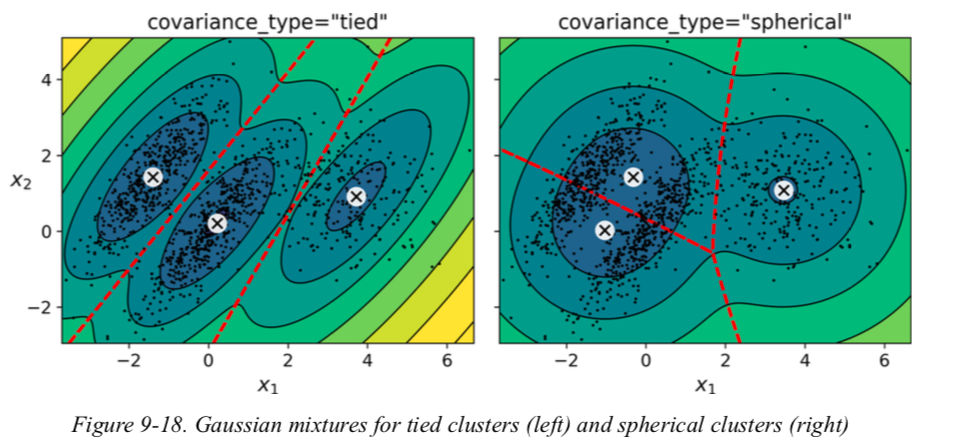

### Anomaly Detection Using Gaussian Mixtures
* detect observations that deviate strongly from the norm
* any observations located in a low-density (threshold) region can be considered an anomaly
* novelty detection: assumes data does not have outliers
* common procedure is to fit a GMM to detect and remove most extreme outliers, then run it again on a cleaner set 

### Selecting the Number of Clusters
* find the model that minimizes a theoretical information criterion
  * Bayesian Information Criterion (BIC)
    * $ BIC = \log(m)p - 2\log(\hat{L}) $
    * more simpler, fewer parameters -> not fit data well as AIC
  * Akaike Information Crtierion (AIC)
    * $ AIC = 2p - 2\log(\hat{L}) $
  * m: number of observations
  * p: number of parameters learned by model
  * $\hat{L}$: maximized value of likelihood function of model
  * penalizes models that have more parameters to learn (more clusters)
  * rewards models that fit well
* cannot use silhouette or inertia on cluster that are not spherical or have different sizes

In [ ]:
# Getting the AIC and BIC values

print(f'BIC: {gm.bic(X)}')
print(f'AIC: {gm.aic(X)}')

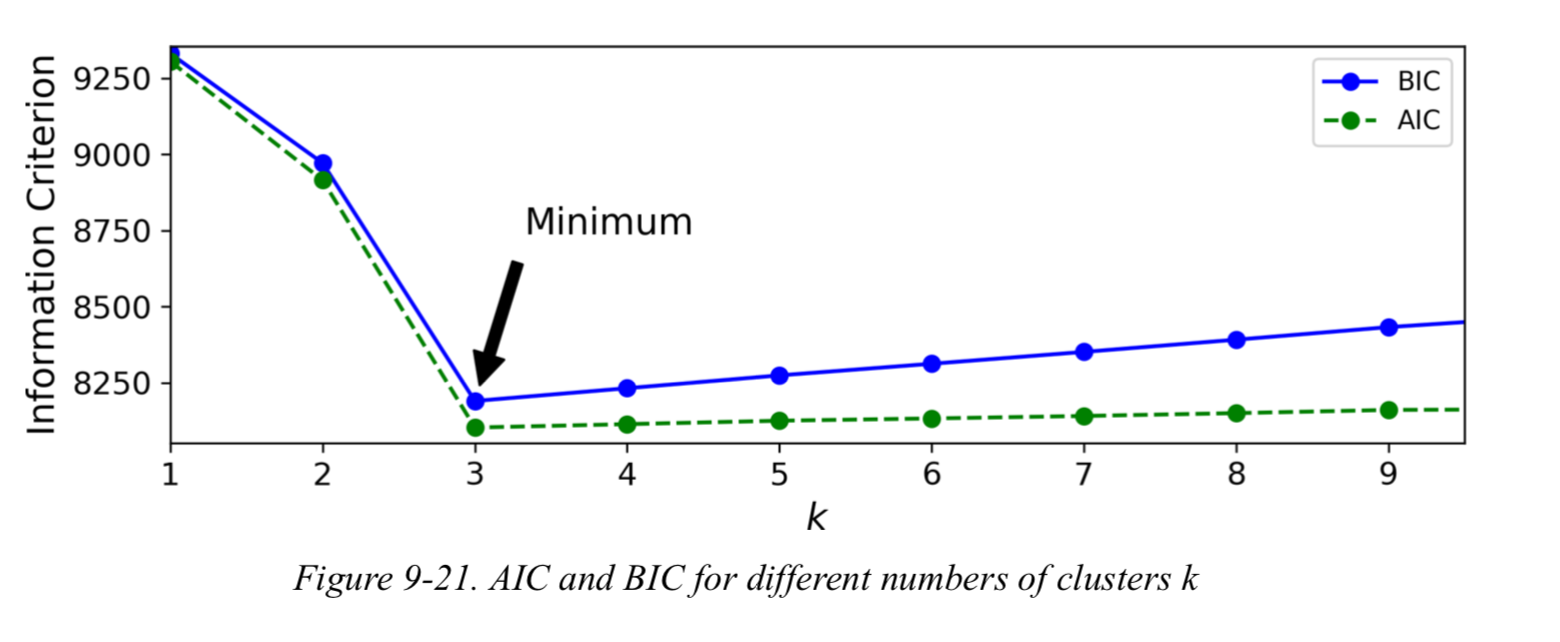

### Bayesian Gaussian Mixture Models
* provides low or zero weights to clusters that are not significant
* latent variables: unknown random variables
* observed variables: known random variables

In [ ]:
# Implementing Bayesian Gaussian Mixture

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)

bgm.fit(X)

np.round(bgm.weights_, 2)

* beta distribution: commonly used to model random variables whose values lie within a fixed range
* Wishart distribution: used to sample covariance matrices
  * parameters d and V control the distribution of cluster shapes
* prior knowledge about latent variables z can be encoded in a probability distribution p(z) called prior

Bayes Theorem
* how to update the probability distribution over latent variables after some data (X) is observed
* computes posterior distribution p(z|X)
  * conditional probability of z given X

\begin{equation} p(z|X) = posterior = \frac{likelihood \times prior}{evidence} = \frac{p(X|z)p(z)}{p(X)} \end{equation}

* p(X) cannot be determined because it requires to integrate all possible values of z which is not possible
  * use variational inference
    * picks a family of distributions q(z;$\lambda$) with its own variational parameters $\lambda$
    * optimizes $\lambda$ to make q(z) a good approximation of p(z|X)
      * finds the values of $\lambda$ that minimizes the KL divergence ($D_{KL}$) from q(z) p(z|X) 

      \begin{equation} D_{KL}(q||p) = E_q[log\frac{q(z)}{p(z|X)}] \end{equation}
      \begin{equation} D_{KL}(q||p) = \log p(X) - ELBO \end{equation}
      \begin{equation} ELBO = E_q[\log{p(z,X)}] - E_q[\log{q(z)}]\end{equation}

* Black Box Stochastic Variational Inference (BBSVI)
  * simple approach to maximize the ELBO
  1. at each iteration, a few samples are drawn from q 
  2. samples are used to estimate the gradients of ELBO with regard to variational parameters $\lambda$ which are used as a gradient ascent step



### Other Algorithms for Anomaly and Novelty Detection
* PCA
  * reconstruction error of anomaly is much larger than RE of an inlier
* Fast-MCD (Minimum Covariance Determinant)
  * assumes inliers are generated from a single Gaussian distribution
  * assumes that there are outliers and ignores them to to estimate the likelihood (parameters of the Gaussian distribution)
* Isolation Forest
  * efficient algorithm for outlier detection, especially in high-dimensional datasets
  * builds a RandomForest
    * DT is built randomly, picks feature randomly and picks threshold randomly
    * data gets data gets chopped into pieces until all observations end up isolated from other observations
  * anomalies are observations that are far away from the others
* Local Outlier Factor (LOF)
  * compares density of observations around a given observation to the density arounds its neighbor
  * anomalies are more isolated than its k nearest neighbors
* One-class SVM
  * better suited for novely detection
  * kernalized SVM 
    * separates two classes by first mapping data into a high-dimensional space, then separating the two classes using SVM classifier within high-dimensional space
  * one-class SVM
    * separate observations in high-dimensional space from the origin

## Likelihood Function

* likelihood: describe how plausible a particular set of parameter values $\theta$ are, after the outcome x is known
  * function of $\theta$ given a fixed x
  * not a proability distribution
  * easier to maximize a log
    * maximizes the sum of the log likelihood functions instead of product of the likelihood function
* probability: describes how plausible a future outcome x is knowing the parameter values $\theta$ 
  * function of x given a fixed $\theta$